Sobre o dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

link dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

##EDA



In [1]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#leitura do dataset e viasualização das informações
df_bike = pd.read_csv('hour.csv')
df_bike.info()
df_bike.drop(['instant','dteday','yr','atemp'],axis = 1,inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
for i in [df_bike.columns]:
  print(df_bike[i].value_counts())

season  mnth  hr  holiday  weekday  workingday  weathersit  temp  hum   windspeed  casual  registered  cnt
3       7     4   0        2        1           1           0.66  0.83  0.0896     0       6           6      2
4       12    6   0        6        0           1           0.24  0.65  0.1045     1       10          11     2
              23  0        6        0           2           0.40  0.94  0.0000     18      144         162    1
2       4     17  0        1        1           1           0.54  0.32  0.4179     67      565         632    1
                           0        0           1           0.70  0.42  0.3284     262     361         623    1
                                                                                                             ..
3       8     15  0        4        1           1           0.78  0.62  0.4627     68      202         270    1
                                                                  0.46  0.1343     104     201         305   

[Text(0.5, 1.0, 'Uso do sistema durante os dias')]

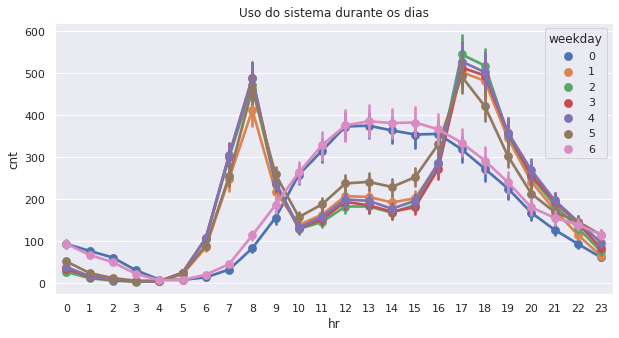

In [4]:
fig,ax = plt.subplots(figsize= (10,5))
sns.pointplot(data = df_bike[['hr','cnt','weekday']], x = 'hr', y = 'cnt', hue ='weekday', ax = ax )
ax.set(title = 'Uso do sistema durante os dias')


[Text(0.5, 1.0, 'Uso do sistema durante os dias')]

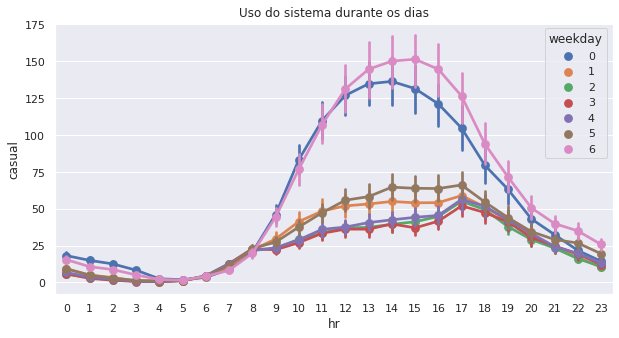

In [5]:
fig,ax = plt.subplots(figsize= (10,5))
sns.pointplot(data = df_bike[['hr','casual','weekday']], x = 'hr', y = 'casual', hue ='weekday', ax = ax )
ax.set(title = 'Uso do sistema durante os dias')


[Text(0.5, 1.0, 'Uso do sistema em relação a temperatura')]

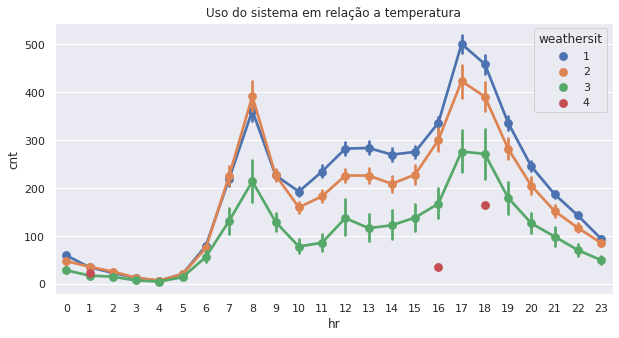

In [6]:
fig,ax = plt.subplots(figsize= (10,5))
sns.pointplot(data = df_bike[['hr','cnt','weathersit']], x = 'hr', y = 'cnt', hue ='weathersit', ax = ax )
ax.set(title = 'Uso do sistema em relação a temperatura')


[Text(0.5, 1.0, 'Uso do sistema com relação a estação do ano')]

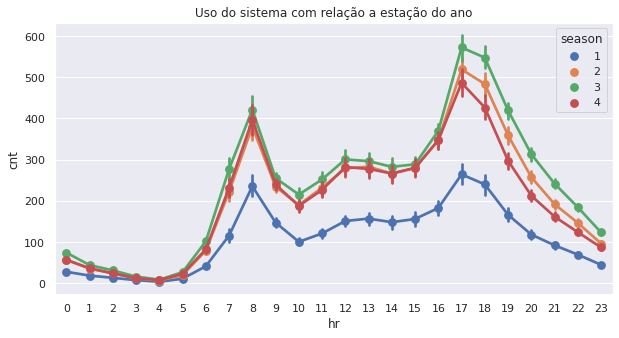

In [7]:
fig,ax = plt.subplots(figsize= (10,5))
sns.pointplot(data = df_bike[['hr','cnt','season']], x = 'hr', y = 'cnt', hue ='season', ax = ax )
ax.set(title = 'Uso do sistema com relação a estação do ano')

[Text(0.5, 1.0, 'Uso do sistema ao mês')]

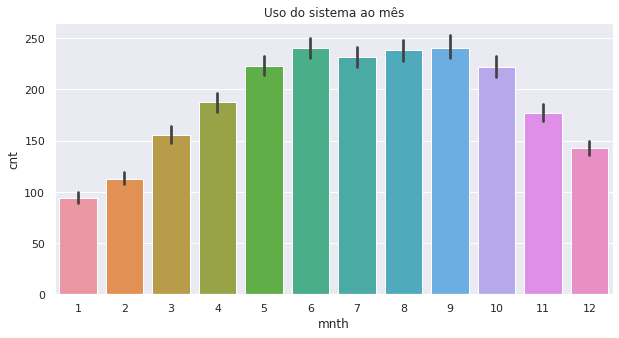

In [8]:
fig,ax = plt.subplots(figsize= (10,5))
sns.barplot(data = df_bike[['mnth','cnt']],x='mnth',y='cnt')
ax.set(title = 'Uso do sistema ao mês')

Text(0, 0.5, 'cnt')

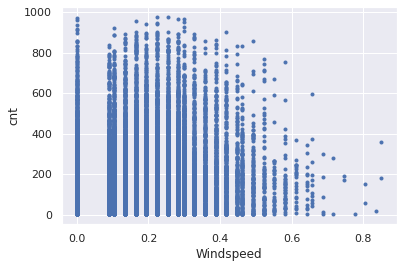

In [9]:
plt.plot(df_bike['windspeed'],df_bike['cnt'],marker = '.', linestyle = 'none')
plt.xlabel('Windspeed')
plt.ylabel('cnt')

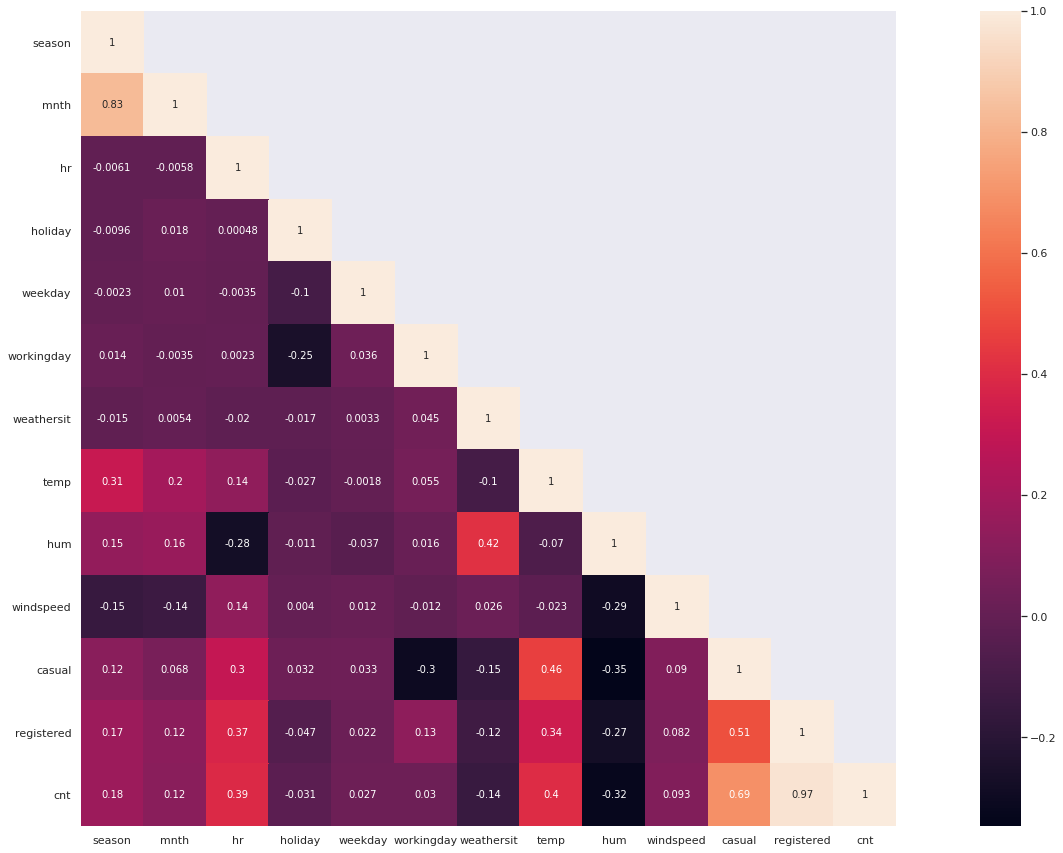

In [10]:
df_corr = df_bike.corr()
mask =  np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize = (30,15))
sns.heatmap(df_corr, mask=mask, vmax =1, square = True, annot = True, )

##REGRESSAO LINEAR

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [12]:
#variavel targert e não targert
y = df_bike['cnt'].values.reshape(-1,1)
X= df_bike.drop(['season','mnth','hr','weekday','weathersit','cnt'],axis = 1).values

In [13]:
#instanciação do regressor
reg = LinearRegression()

In [14]:
#treinando o modelo
cv_results = cross_val_score(reg,X,y,cv = 10)

In [15]:
#media
np.mean(cv_results)

1.0

##REGRESSÃO COM REDES NEURAIS

In [16]:
#importação das Bibliotecas
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

In [17]:
#normalização
df_bike['casual'] = df_bike['casual']/max(df_bike['casual'])
df_bike['registered'] = df_bike['registered']/max(df_bike['registered'])
df_bike['cnt'] = df_bike['cnt']/max(df_bike['cnt'])

In [18]:
#OneHotEncoder
one = OneHotEncoder()
x = df_bike[['season','mnth','hr','weekday','weathersit']].values.reshape(-1,5)
one.fit(x)
x1= one.fit_transform(x).toarray()
#junção das variaveis previsoras
X2 = np.concatenate([X,x1],axis = 1)
seed = 10
rede = MLPRegressor(hidden_layer_sizes= (100,90,50,20), activation= 'identity', random_state=seed, max_iter= 1000, verbose= False)

In [19]:
#media do cross
cv_results2 = cross_val_score(rede, X2, y, cv= 10)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when 

In [20]:
np.mean(cv_results2)

0.9999998265940535